In [1]:
import numpy, pybiomart, pandas, seaborn

import scanpy
scanpy.set_figure_params(dpi_save=1000)

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'FreeSans', 
                            'xtick.labelsize':20, 
                            'ytick.labelsize':20, 
                            'figure.figsize':(12, 8)})

# input data

In [3]:
# from http://godsnotwheregodsnot.blogspot.de/2012/09/color-distribution-methodology.html
# from https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py

 # "#000000",  # remove the black, as often, we have black colored annotation
godsnot_102 = [
    "#FFFF00", "#1CE6FF","#FF34FF","#FF4A46","#008941","#006FA6","#A30059","#FFDBE5","#7A4900",
    "#0000A6","#63FFAC","#B79762","#004D43","#8FB0FF","#997D87","#5A0007","#809693","#6A3A4C",
    "#1B4400","#4FC601","#3B5DFF","#4A3B53","#FF2F80","#61615A","#BA0900","#6B7900","#00C2A0",
    "#FFAA92","#FF90C9","#B903AA","#D16100","#DDEFFF","#000035","#7B4F4B","#A1C299","#300018",
    "#0AA6D8","#013349","#00846F","#372101","#FFB500","#C2FFED","#A079BF","#CC0744","#C0B9B2",
    "#C2FF99","#001E09","#00489C","#6F0062","#0CBD66","#EEC3FF","#456D75","#B77B68","#7A87A1",
    "#788D66","#885578","#FAD09F","#FF8A9A","#D157A0","#BEC459","#456648","#0086ED","#886F4C",
    "#34362D","#B4A8BD","#00A6AA","#452C2C","#636375","#A3C8C9","#FF913F","#938A81","#575329",
    "#00FECF","#B05B6F","#8CD0FF","#3B9700","#04F757","#C8A1A1","#1E6E00","#7900D7","#A77500",
    "#6367A9","#A05837","#6B002C","#772600","#D790FF","#9B9700","#549E79","#FFF69F","#201625",
    "#72418F","#BC23FF","#99ADC0","#3A2465","#922329","#5B4534","#FDE8DC","#404E55","#0089A3",
    "#CB7E98","#A4E804","#324E72"]

a = godsnot_102[0]; b = godsnot_102[5]
x = godsnot_102
x[0] = 'skyblue'
x[5] = 'gold'
x.append(a); x.append(b)
y = x + x
two_hundred_colors = y[:200]
print(len(two_hundred_colors))

200


In [4]:
iso1 = 'ENST00000354449.7'
iso2 = 'ENST00000354956.9'

In [5]:
%%time
input_file = '/home/adrian/databases/gtex/all_transcripts_zscore.tsv'
adata = scanpy.read_csv(input_file, delimiter='\t')
adata

CPU times: user 43.9 s, sys: 1.09 s, total: 44.9 s
Wall time: 45.6 s


AnnData object with n_obs × n_vars = 46490 × 4385

In [6]:
%%time
zscore_df = pandas.read_csv(input_file, index_col=0, sep='\t')
print(zscore_df.shape)
zscore_df.head()

(46490, 4385)
CPU times: user 31.2 s, sys: 980 ms, total: 32.2 s
Wall time: 32.2 s


,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-X88G-0426-SM-47JZ5,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-WHPG-0226-SM-3NMB9,GTEX-P44H-0526-SM-2XCF1,GTEX-11ONC-2326-SM-5HL6P,...,GTEX-144GO-0126-SM-5LUAO,GTEX-1313W-1626-SM-5J1OE,GTEX-12ZZY-1526-SM-5LZWF,GTEX-QMRM-0826-SM-3NB33,GTEX-OOBK-2626-SM-2HMKY,GTEX-1117F-2826-SM-5GZXL,GTEX-11ZTS-3326-SM-5LU9Y,GTEX-ZA64-2126-SM-5Q5A8,GTEX-Q2AG-2826-SM-2HMJQ,GTEX-XV7Q-0426-SM-4BRVN
sample,,,,,,,,,,,,,,,,,,,,,
ENST00000625998.2,0.201517,0.036483,-2.678424,-1.913425,-0.196345,-1.555508,0.632833,-2.103236,0.078840,-0.065244,...,-1.851241,-0.028877,0.104782,-1.695963,-0.742029,-0.091520,0.168139,-1.158666,1.260004,-0.326773
ENST00000583693.5,-0.157536,-0.387785,0.348795,0.398806,-1.129253,0.687884,0.582988,0.557330,-1.350953,-1.209634,...,-0.173132,-1.156789,-0.024576,0.025022,0.682437,-0.352807,2.375209,-0.067561,2.293898,-0.429855
ENST00000012134.6,-1.858374,-0.230357,-1.101552,-1.678630,0.351186,-0.498028,0.051742,0.196520,-0.976582,0.499852,...,-0.537618,-0.037223,0.879018,-1.132267,0.183165,-0.377856,-0.203226,-0.120816,1.457736,-0.879079
ENST00000403263.5,1.824639,0.803760,-0.939061,-0.804629,-0.097733,-0.456441,2.261055,0.277584,2.031893,-0.600251,...,-0.607003,-0.588132,0.423970,0.384197,-1.341820,0.128895,-0.985785,0.765705,0.074665,-1.675408
ENST00000449352.6,-0.714858,0.391161,-0.649496,-0.251540,0.275481,-0.622791,0.703996,-0.210234,-1.321825,0.461139,...,1.286650,-1.422651,0.540561,-0.532098,-1.155870,-1.024148,0.439395,-0.473859,-1.347097,-2.987846


# PCA

In [7]:
scanpy.tl.pca(adata, n_comps=100)

# umap and leiden

## all colors

/home/adrian/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


/home/adrian/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


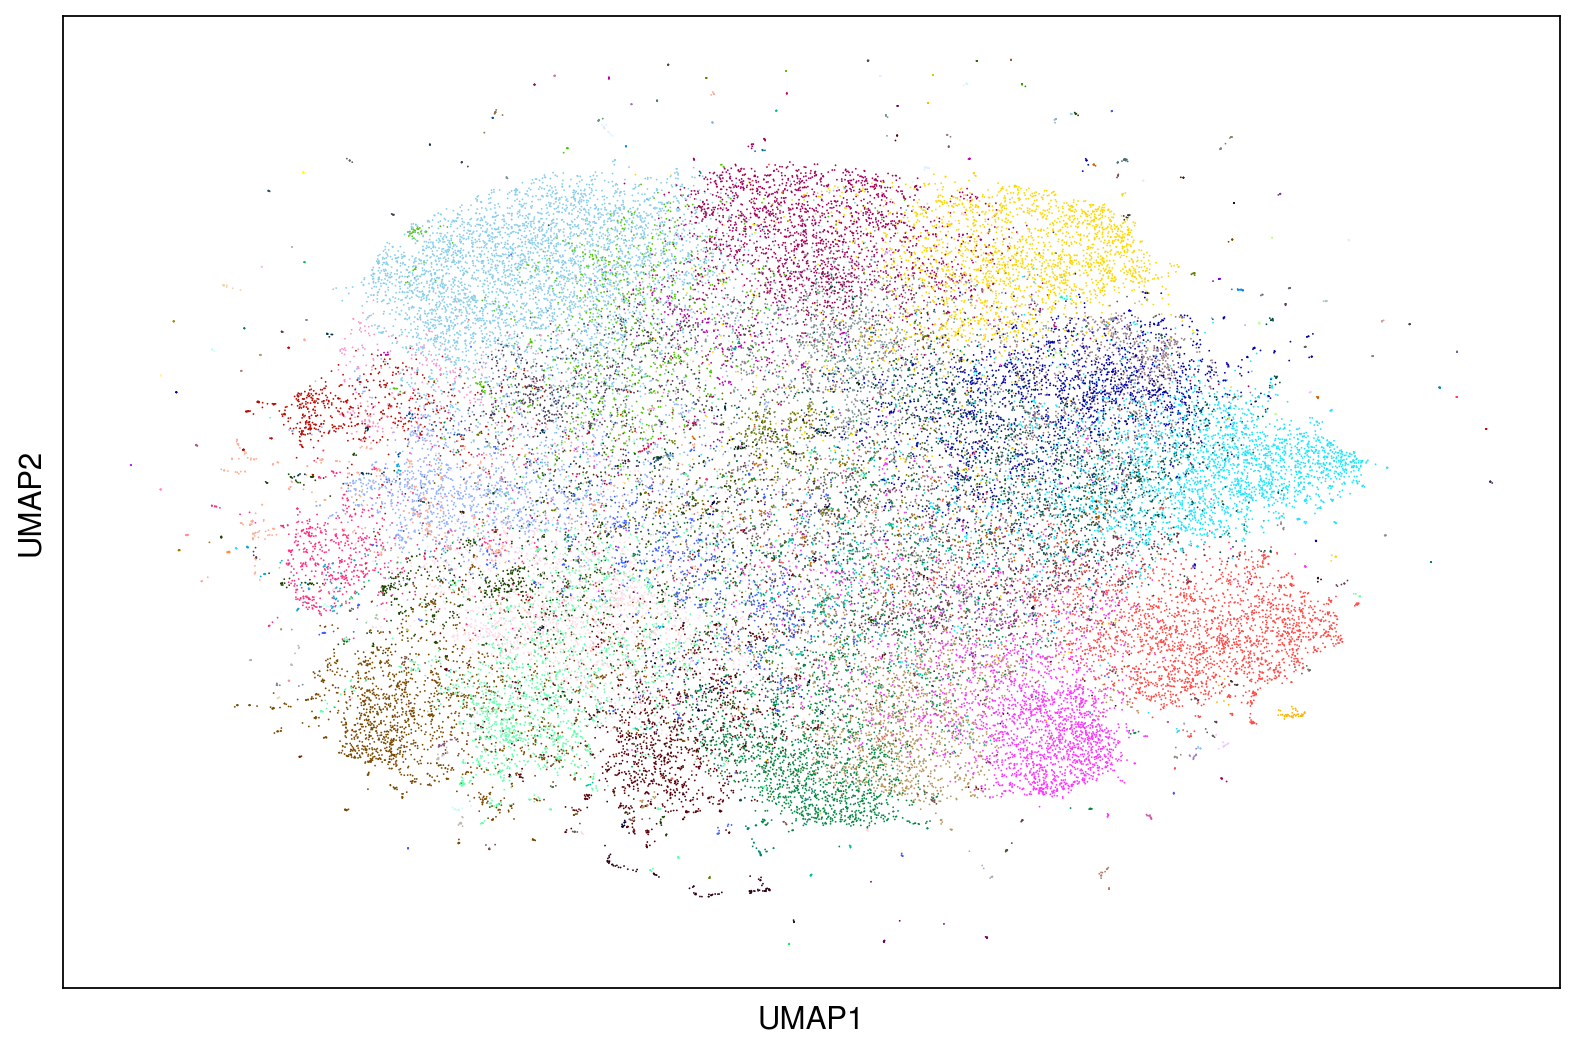

CPU times: user 37 s, sys: 1.51 s, total: 38.5 s
Wall time: 34 s


In [8]:
%%time

nei = 5
dist = 0.2
spre = 10

scanpy.pp.neighbors(adata, n_neighbors=nei, n_pcs=100)
scanpy.tl.leiden(adata)
scanpy.tl.paga(adata)
scanpy.pl.paga(adata, plot=False)
scanpy.tl.umap(adata, min_dist=dist, spread=spre, init_pos='paga')         
ax = scanpy.pl.umap(adata, color=['leiden'], palette=two_hundred_colors, legend_loc=None, title='', save='col.png')

## white

/home/adrian/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


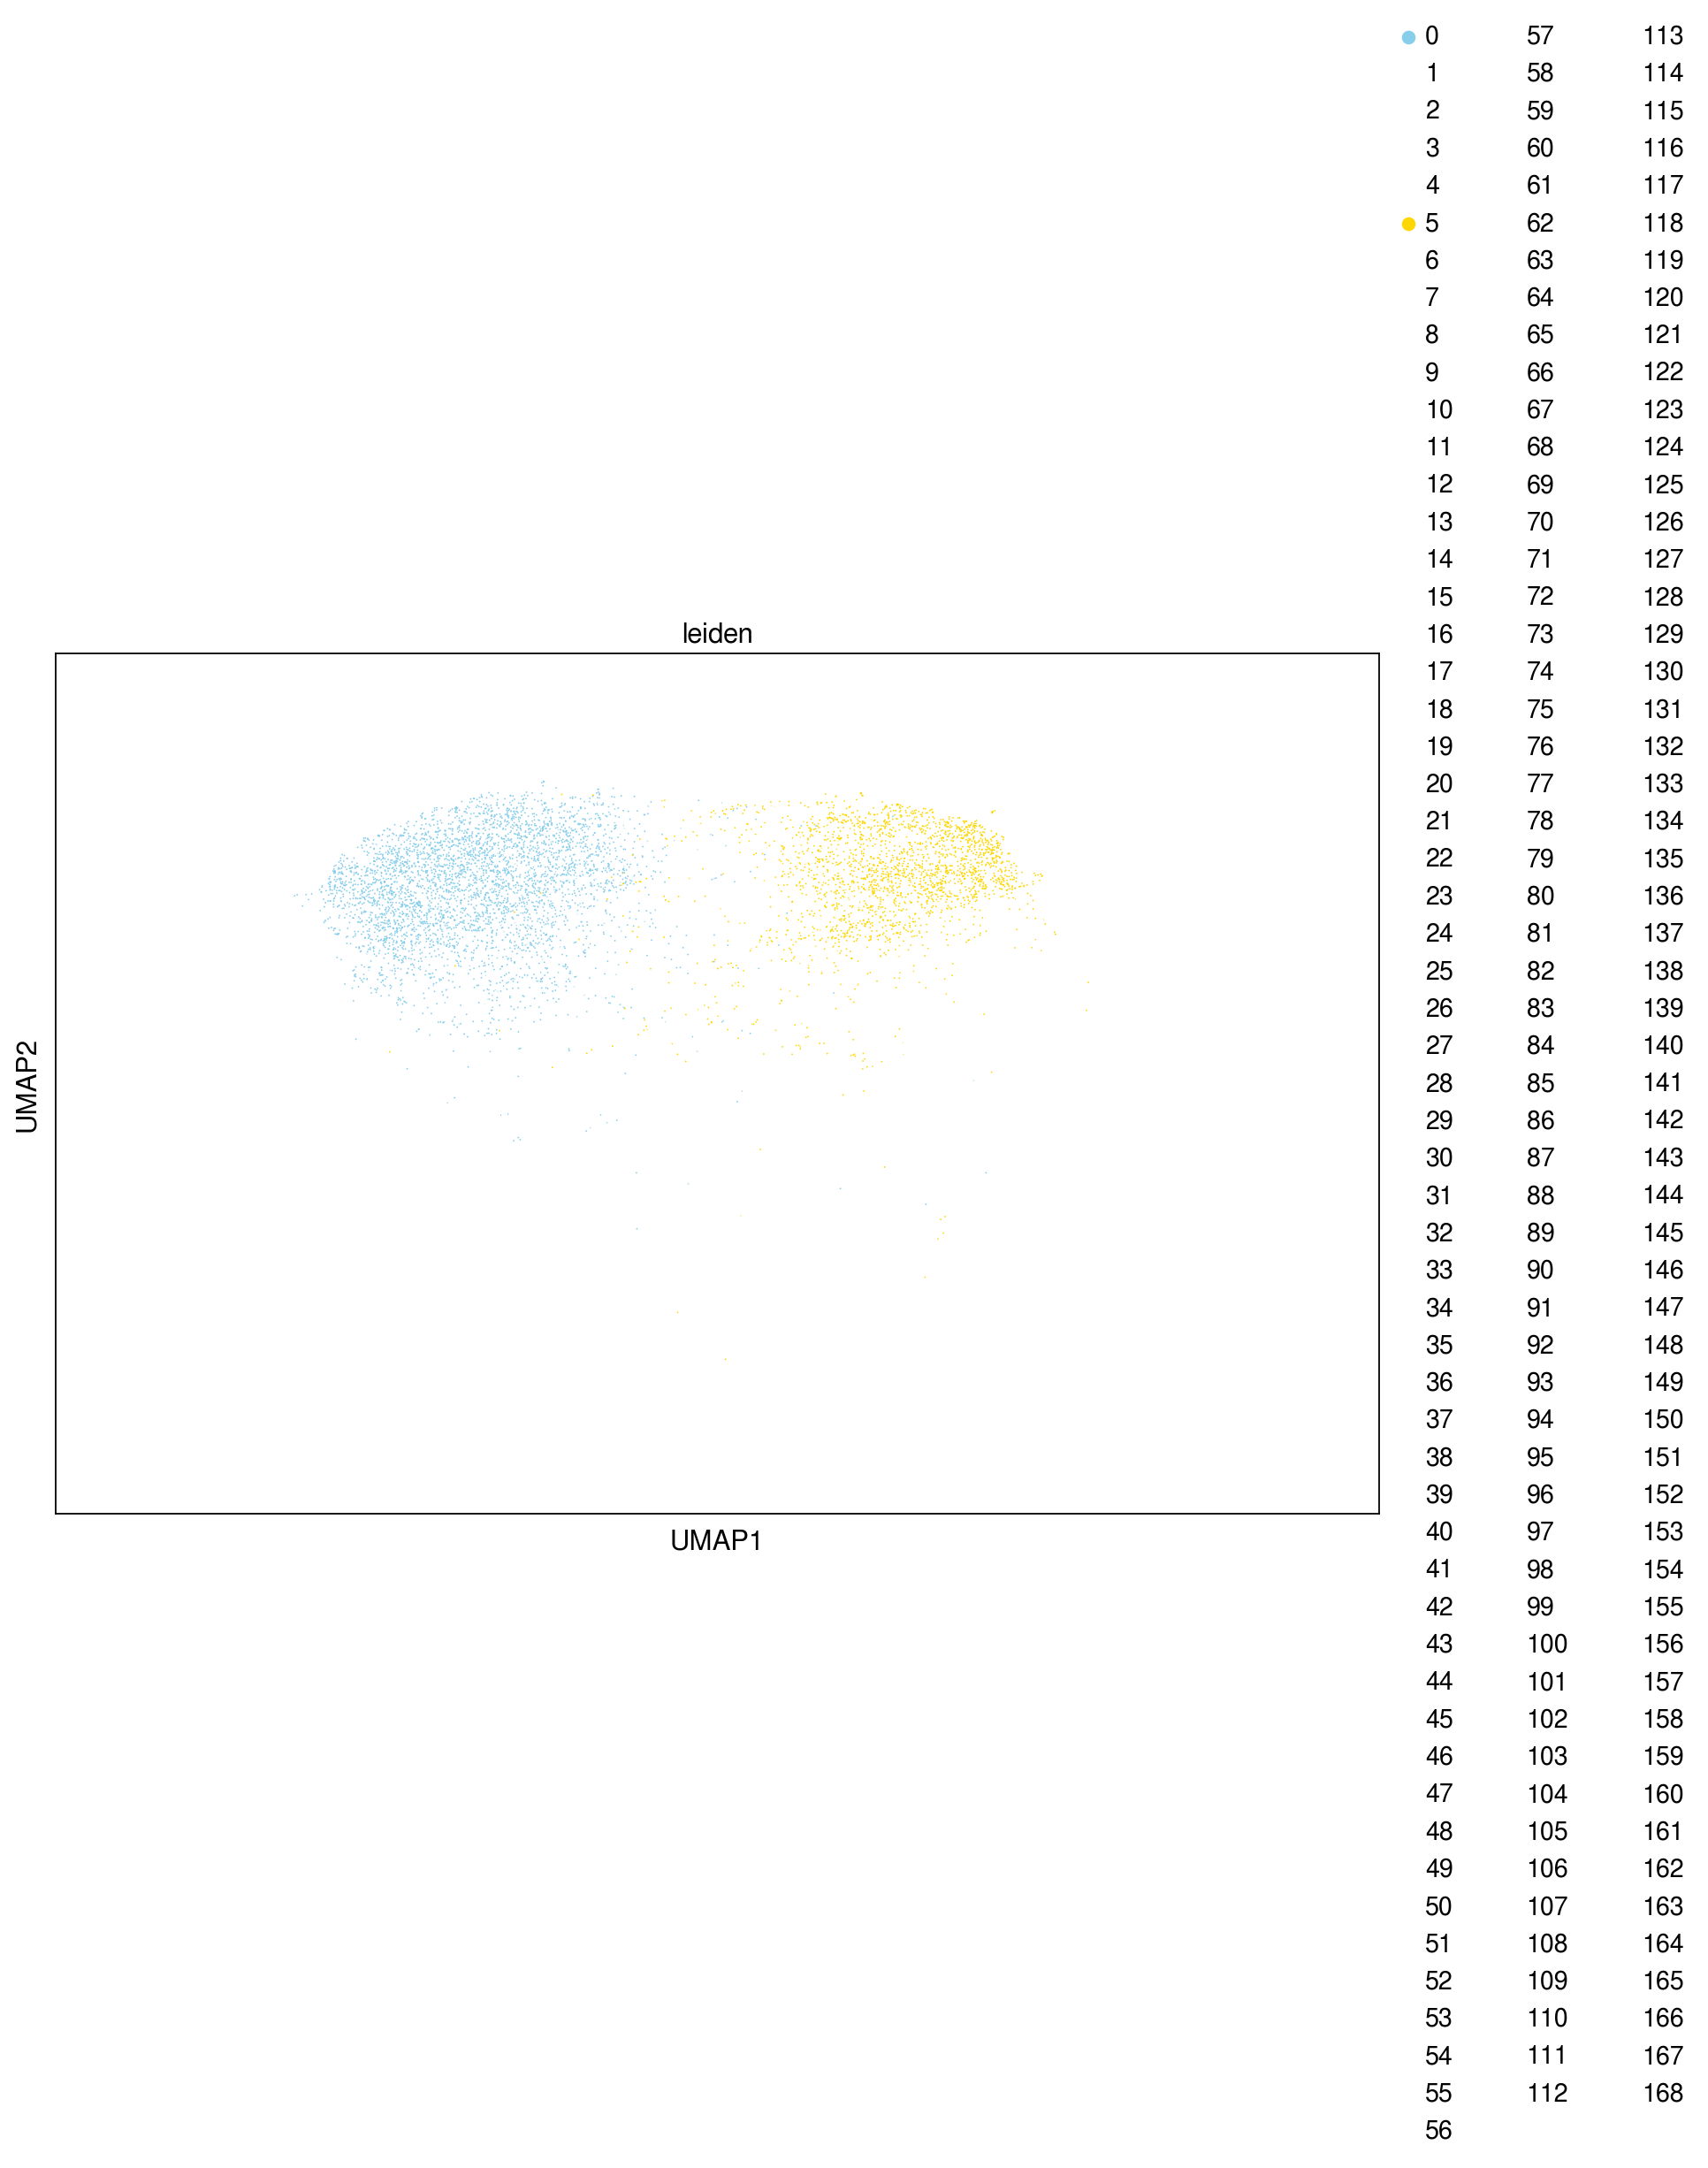

In [10]:
my_colors = []
for category in range(len(adata.obs['leiden'].cat.categories)):
    if str(category) == adata.obs['leiden'][iso1]:
        my_colors.append('gold')
    elif str(category) == adata.obs['leiden'][iso2]:
        my_colors.append('skyblue')
    else:
        my_colors.append('white')
scanpy.pl.umap(adata, color='leiden', palette=my_colors)

## with stars

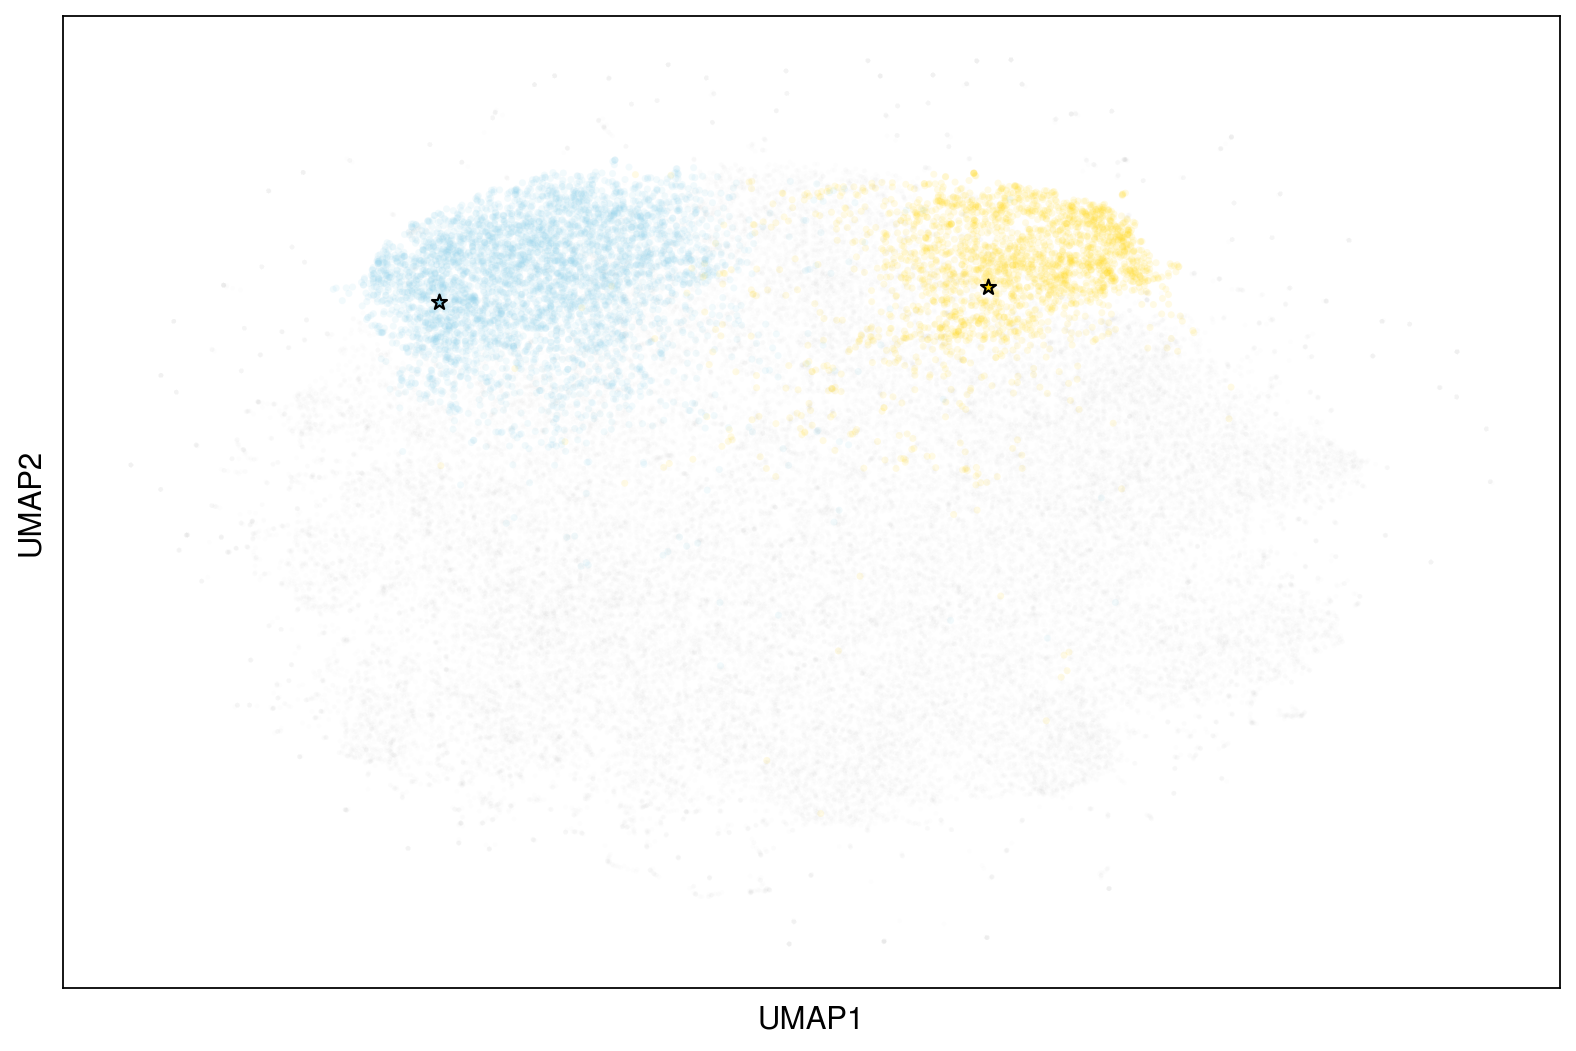

In [11]:
umap0 = adata.obsm['X_umap'][:, 0]
umap1 = adata.obsm['X_umap'][:, 1]

group1x = []; group1y = []
group2x = []; group2y = []
othersx = []; othersy = []

gold_transcripts = []; skyblue_transcripts = []

for i in range(len(adata.obs.index)):

    transcript = adata.obs.index[i]
    label = adata.obs.loc[transcript, 'leiden']
    x = adata.obsm['X_umap'][i, 0] 
    y = adata.obsm['X_umap'][i, 1]

    if label == adata.obs.loc[iso1, 'leiden']:
        group1x.append(x); group1y.append(y)
        gold_transcripts.append(transcript)
    elif label == adata.obs.loc[iso2, 'leiden']:
        group2x.append(x); group2y.append(y)
        skyblue_transcripts.append(transcript)
    else:
        othersx.append(x); othersy.append(y)

matplotlib.pyplot.scatter(group1x, group1y, s=10, c='gold', alpha=0.1, edgecolors='none')
matplotlib.pyplot.scatter(group2x, group2y, s=10, c='skyblue', alpha=0.1, edgecolors='none')
matplotlib.pyplot.scatter(othersx, othersy, s=5, c='gray', alpha=0.01, edgecolors='none')

# location of iso1 and iso2
position1 = adata.obsm['X_umap'][adata.obs.index.get_loc(iso1), :]
position2 = adata.obsm['X_umap'][adata.obs.index.get_loc(iso2), :]
matplotlib.pyplot.scatter(position1[0], position1[1], s=50, c='gold', edgecolors='black', marker='*')
matplotlib.pyplot.scatter(position2[0], position2[1], s=50, c='skyblue', marker='*', edgecolors='black')

matplotlib.pyplot.xlabel('UMAP1')
matplotlib.pyplot.ylabel('UMAP2')
matplotlib.pyplot.xticks([])
matplotlib.pyplot.yticks([])

#matplotlib.pyplot.show()
matplotlib.pyplot.savefig('stars.png', dpi=1000)

# work with co-expressed transcripts towards heatmaps 

In [13]:
print(len(gold_transcripts), len(skyblue_transcripts))

print(iso1 in gold_transcripts, iso2 in gold_transcripts)
print(iso2 in skyblue_transcripts, iso1 in skyblue_transcripts)

2346 4252
True False
True False


In [14]:
gold_df = zscore_df.loc[gold_transcripts, :]
print(gold_df.shape)
skyblue_df = zscore_df.loc[skyblue_transcripts, :]
print(skyblue_df.shape)

(2346, 4385)
(4252, 4385)


In [15]:
gold_df.to_csv('gold.csv')
skyblue_df.to_csv('skyblue.csv')